In [16]:
import sys 
sys.path.append("/Users/johnzhou/research/decision-making")

In [17]:
from omegaconf import OmegaConf
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [19]:
def sigmoid(x, eps: float, alpha: float, s: int) -> float:
    """
    Sigmoid curve with additional epsilon "lapse" parameter.
    :param eps: float in range [0, 1], epsilon exploration parameter, influences maximum value.
    :param alpha: logistic growth rate indicating steepness of the curve.
    :param x: int indicating trial index, where the first trial after the block switch has index 0.
    :param s: trial index at curve's midpoint.
    :return: float in range [0, 1] indicating some percentage.
    """
    return 2 * (eps + (1 - 2 * eps) / (1 + np.exp(-alpha * (x - s)))) - 1

In [54]:
ql_feats = np.load("/Users/johnzhou/research/decision-making/data/qlearning_sim_features.npy")
ql_labels = np.load("/Users/johnzhou/research/decision-making/data/qlearning_sim_labels.npy")
inf_feats = np.load("/Users/johnzhou/research/decision-making/data/inference_sim_features.npy")
inf_labels = np.load("/Users/johnzhou/research/decision-making/data/inference_sim_labels.npy")
real_feats = np.load("/Users/johnzhou/research/decision-making/data/DynamicForaging/real_data.npy").T
print(inf_feats.shape)
og_feats = np.concatenate((ql_feats, inf_feats, real_feats), axis=1).T

(4, 500)


In [55]:


ql_feats = (ql_feats - np.expand_dims(np.mean(ql_feats, axis=1), 1)) / np.expand_dims(np.std(ql_feats, axis=1), 1)
inf_feats = (inf_feats - np.expand_dims(np.mean(inf_feats, axis=1), 1)) / np.expand_dims(np.std(inf_feats, axis=1), 1)
real_feats = (real_feats - np.expand_dims(np.mean(real_feats, axis=1), 1)) / np.expand_dims(np.std(real_feats, axis=1), 1)


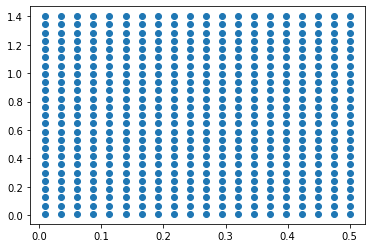

In [56]:
plt.figure()
plt.scatter(ql_labels[0, :], ql_labels[1, :])
plt.show()

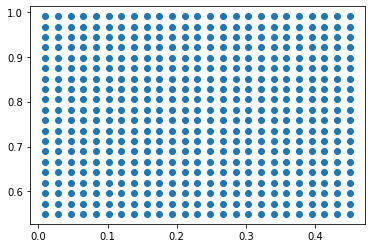

In [57]:
plt.figure()
plt.scatter(inf_labels[0, :], inf_labels[1, :])
plt.show()

In [58]:
all_feats = np.concatenate((ql_feats, inf_feats, real_feats), axis=1).T

X_embedded = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca').fit_transform(all_feats)
print(X_embedded.shape)

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


(1220, 2)


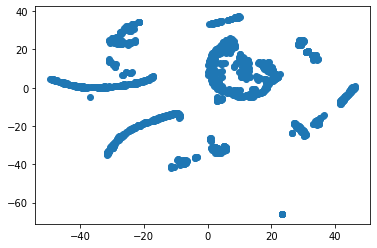

In [59]:
plt.figure()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()

In [60]:
# max_sil_k = -float('inf')
# max_sil = -float('inf')
# sil_list = []
# for k in range(2, 20):
#     labels = KMeans(n_clusters=9, random_state=0).fit(X_embedded).labels_
#     sil = silhouette_score(X_embedded, labels, metric = 'euclidean')
#     sil_list.append(sil)
#     if sil > max_sil:
#         max_sil_k = k
#         max_sil = sil
# print(k)
# print(sil_list)

n_clusters = 8

init = np.array([(-35, 0),
                (-10, -30),
                (-20, 30),
                (5, 0),
                (20, 40),
                (35, 0),
                (30, -30),
                (30, -60)] )

cluster_labels = KMeans(n_clusters=n_clusters, random_state=0, init=init, algorithm="elkan").fit(X_embedded).labels_

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1149: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


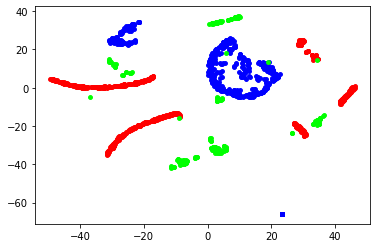

In [61]:
plt.figure()
for idx, pt in enumerate(X_embedded):
    if idx < 500:
        plt.scatter(*pt, color='blue', s=15)
    elif idx < 1000:
        plt.scatter(*pt, color='red', s=15)
    else:
        plt.scatter(*pt, color='lime', s=15)
plt.show()

(1220, 2)


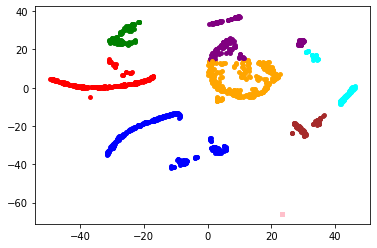

In [62]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'brown', 'pink', 'yellow']

print(X_embedded.shape)
# for i in range(X_embedded.shape[0]):
#     if X_embedded[i, 0] < -15:
#         cluster_labels[i] = 0

plt.figure()
for idx, pt in enumerate(X_embedded):
    plt.scatter(*pt, color=colors[cluster_labels[idx]], s=15)
plt.show()

187
[2.14468179e-02 2.62875398e+01 1.24277519e+00]


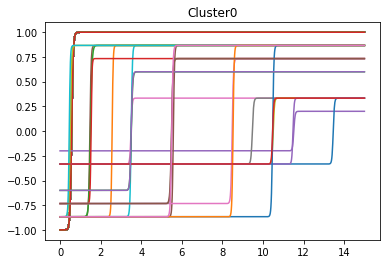

270
[3.22747681e-03 1.98121540e+01 1.68269327e+00]


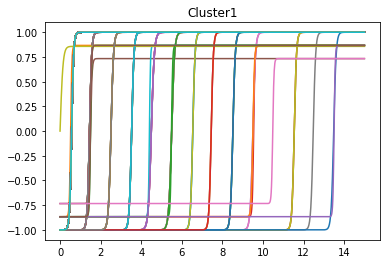

101
[ 0.19937833 23.48157679  0.7858188 ]


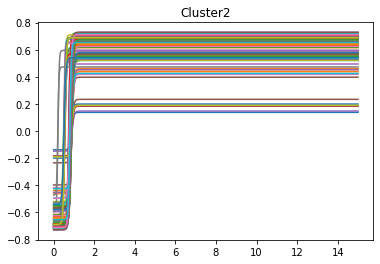

289
[0.09475023 0.73055297 6.5780725 ]


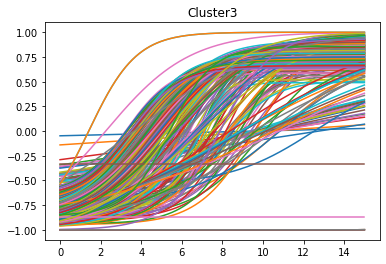

168
[0.25774908 4.18665589 4.93373357]


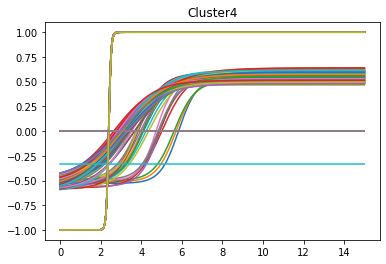

90
[5.34003811e-03 1.52073047e+01 9.23179528e+00]


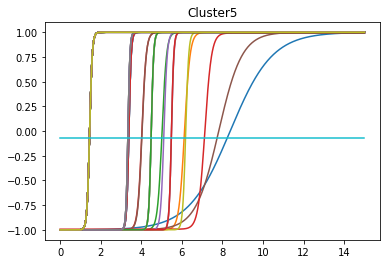

76
[0.01163478 9.96172599 4.7203461 ]


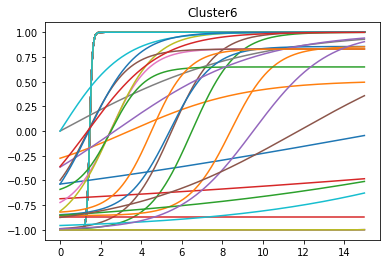

In [63]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'brown', 'pink', 'yellow']

cluster_idxs = [np.argwhere((cluster_labels == i)) for i in range(n_clusters)]
plt.figure(1)
# -1 to ignore unfit cluster
for i in range(n_clusters - 1):
    print(len(cluster_idxs[i]))
    avg_params = np.zeros(3)
    for j in range(len(cluster_idxs[i])):
        params = list(og_feats[cluster_idxs[i][j], :])[0][:3]
#         if i == 0 and j == 0:
#             print(params)
#         if i == 5 and j == 0:
#             print(params)
        plt.plot(np.linspace(0, 15, num=1000), 
                 sigmoid(np.linspace(0, 15, num=1000), *params))
        avg_params += params
    print(avg_params / len(cluster_idxs[i]))
        
    plt.title(f"Cluster{i}")
    plt.ylim = [0, 1]
    plt.show()
    
    

In [189]:
zero_idxs = [x[0] - 500 for x in cluster_idxs[3]]
for pair in list(zip(inf_labels[:, zero_idxs][0], inf_labels[:, zero_idxs][1])):
    print(pair)

(0.15666666666666668, 0.55)
(0.17500000000000002, 0.55)
(0.19333333333333336, 0.55)
(0.21166666666666667, 0.55)
(0.23, 0.55)
(0.13833333333333334, 0.5731578947368422)
(0.15666666666666668, 0.5731578947368422)
(0.17500000000000002, 0.5731578947368422)
(0.19333333333333336, 0.5731578947368422)
(0.21166666666666667, 0.5731578947368422)
(0.23, 0.5731578947368422)
(0.13833333333333334, 0.5963157894736842)
(0.15666666666666668, 0.5963157894736842)
(0.17500000000000002, 0.5963157894736842)
(0.19333333333333336, 0.5963157894736842)
(0.21166666666666667, 0.5963157894736842)
(0.23, 0.5963157894736842)
(0.12, 0.6194736842105264)
(0.13833333333333334, 0.6194736842105264)
(0.15666666666666668, 0.6194736842105264)
(0.17500000000000002, 0.6194736842105264)
(0.19333333333333336, 0.6194736842105264)
(0.21166666666666667, 0.6194736842105264)
(0.23, 0.6194736842105264)
(0.12, 0.6426315789473684)
(0.13833333333333334, 0.6426315789473684)
(0.15666666666666668, 0.6426315789473684)
(0.17500000000000002, 0.64

In [126]:
i = 1
feat = inf_feats[i, :]
print(np.histogram(feat, bins=4))
ind = np.argpartition(feat, -50)[-20:]
print(ind)

(array([328,   0,   1, 171]), array([-0.72227583, -0.12153775,  0.47920032,  1.0799384 ,  1.68067647]))
[175 250 251 176 178 102 101 231 232 425 426 325 200 201   6   5   4   3
   2 258]


In [ ]:
fig, ax = plt.subplots()
titles = ["epsilons", "alphas", "s", "foraging efficiency"]
i = 0

feat = ql_feats[i, :]

eps = np.linspace(0.01, 0.5, num=20)
lr = np.linspace(0.01, 1.4, num=25)
epss, lrs = np.meshgrid(eps, lr)
z = np.reshape(feat, (25, 20))
plt.xlabel("epsilon")
plt.ylabel("learning rate")

c = ax.pcolormesh(epss, lrs, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(epss), np.max(epss), np.min(lrs), np.max(lrs)])
fig.colorbar(c, ax=ax)


431


/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


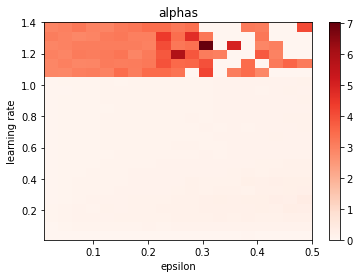

In [86]:
fig, ax = plt.subplots()
i = 1

feat = np.copy(ql_feats[i, :])
z = np.reshape(feat, (25, 20))
plt.xlabel("epsilon")
plt.ylabel("learning rate")

print(np.argmax(feat))

c = ax.pcolormesh(epss, lrs, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(epss), np.max(epss), np.min(lrs), np.max(lrs)])
fig.colorbar(c, ax=ax)

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


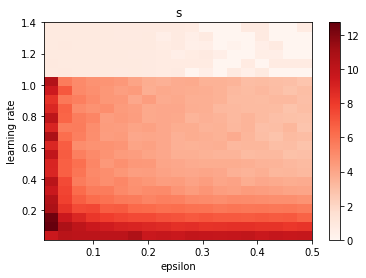

In [87]:
fig, ax = plt.subplots()
i = 2

feat = ql_feats[i, :]
z = np.reshape(feat, (25, 20))
plt.xlabel("epsilon")
plt.ylabel("learning rate")

c = ax.pcolormesh(epss, lrs, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(epss), np.max(epss), np.min(lrs), np.max(lrs)])
fig.colorbar(c, ax=ax)


/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


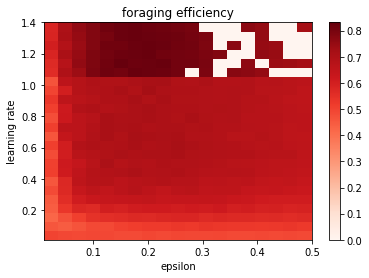

In [88]:
fig, ax = plt.subplots()
i = 3

feat = ql_feats[i, :]
z = np.reshape(feat, (25, 20))
plt.xlabel("epsilon")
plt.ylabel("learning rate")

c = ax.pcolormesh(epss, lrs, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(epss), np.max(epss), np.min(lrs), np.max(lrs)])
fig.colorbar(c, ax=ax)


/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


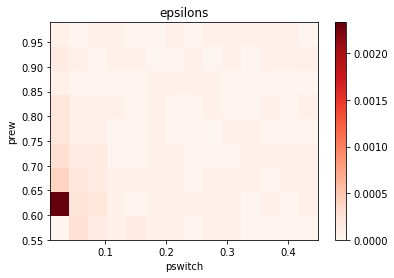

In [89]:
fig, ax = plt.subplots()
titles = ["epsilons", "alphas", "s", "foraging efficiency"]
i = 0

feat = inf_feats[i, :]

pswitches = np.linspace(0.01, 0.45, num=15)
prews = np.linspace(0.55, 0.99, num=10)
pswitches, prews = np.meshgrid(pswitches, prews)
z = np.reshape(feat, (10, 15))
plt.xlabel("pswitch")
plt.ylabel("prew")

c = ax.pcolormesh(pswitches, prews, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(pswitches), np.max(pswitches), np.min(prews), np.max(prews)])
fig.colorbar(c, ax=ax)

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


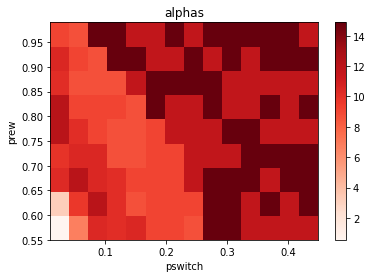

In [90]:
fig, ax = plt.subplots()
titles = ["epsilons", "alphas", "s", "foraging efficiency"]
i = 1

feat = inf_feats[i, :]

pswitches = np.linspace(0.01, 0.45, num=15)
prews = np.linspace(0.55, 0.99, num=10)
pswitches, prews = np.meshgrid(pswitches, prews)
z = np.reshape(feat, (10, 15))
plt.xlabel("pswitch")
plt.ylabel("prew")

c = ax.pcolormesh(pswitches, prews, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(pswitches), np.max(pswitches), np.min(prews), np.max(prews)])
fig.colorbar(c, ax=ax)

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


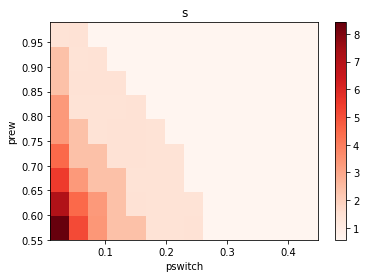

In [91]:
fig, ax = plt.subplots()
titles = ["epsilons", "alphas", "s", "foraging efficiency"]
i = 2

feat = inf_feats[i, :]

pswitches = np.linspace(0.01, 0.45, num=15)
prews = np.linspace(0.55, 0.99, num=10)
pswitches, prews = np.meshgrid(pswitches, prews)
z = np.reshape(feat, (10, 15))
plt.xlabel("pswitch")
plt.ylabel("prew")

c = ax.pcolormesh(pswitches, prews, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(pswitches), np.max(pswitches), np.min(prews), np.max(prews)])
fig.colorbar(c, ax=ax)

/Users/johnzhou/anaconda3/envs/yass/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


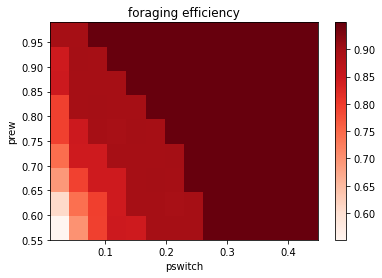

In [92]:
fig, ax = plt.subplots()
titles = ["epsilons", "alphas", "s", "foraging efficiency"]
i = 3

feat = inf_feats[i, :]

pswitches = np.linspace(0.01, 0.45, num=15)
prews = np.linspace(0.55, 0.99, num=10)
pswitches, prews = np.meshgrid(pswitches, prews)
z = np.reshape(feat, (10, 15))
plt.xlabel("pswitch")
plt.ylabel("prew")

c = ax.pcolormesh(pswitches, prews, z, cmap='Reds', vmin=np.min(feat), vmax=np.max(feat))
ax.set_title(titles[i])
# set the limits of the plot to the limits of the data
ax.axis([np.min(pswitches), np.max(pswitches), np.min(prews), np.max(prews)])
fig.colorbar(c, ax=ax)